In [94]:
import pandas as pd
import numpy as np
import pyodbc
import re
import datetime as dt

In [2]:
server = 'datathon.database.windows.net'
database = 'datathon_mssql' 
username = 'datathonuser' 
password = '1qaz@WSX3edc' 
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

In [4]:
item_prefered = ['茶葉蛋', '薯條-大', '脆薯(中)', '招牌鍋貼', '加購四雞塊', '卡啦脆雞k', '餐-雙層牛肉', '雙蔬鮪魚飯糰', '四塊麥克雞塊'
                '餐-六塊雞', '餐-勁辣雞腿', '茶葉蛋(入倉)', '白飯', '便當', '餐-大麥克', '餐-豬滿蛋', '三起司熱狗', 'C法式香雞堡'
                '麵包', '御選肉鬆飯糰', '雞米花(小)', '薯條-小', '韓式辣味鍋貼', '雞肉飯飯糰', 'C四塊雞塊']

In [5]:
sql = '''

select *
from datathon_mssql.dbo.invoice_qmonster2 with(nolock)
where item_name in (N'茶葉蛋', N'薯條-大', N'脆薯(中)', N'招牌鍋貼', N'加購四雞塊', N'卡啦脆雞k', N'餐-雙層牛肉', N'雙蔬鮪魚飯糰', 
                N'四塊麥克雞塊', N'餐-六塊雞', N'餐-勁辣雞腿', N'茶葉蛋(入倉)', N'白飯', N'便當', N'餐-大麥克', N'餐-豬滿蛋', 
                N'三起司熱狗', N'C法式香雞堡', N'麵包', N'御選肉鬆飯糰', N'雞米花(小)', N'薯條-小', N'韓式辣味鍋貼', N'雞肉飯飯糰', 
                N'C四塊雞塊')

'''

prefer_food = pd.read_sql(sql,cnxn)

,invoice_serial,item_sql,item_name,item_price,item_quantity,item_total,invoice_generatetime,invoice_logintime,company_name,address,member_serial,member_sex,member_age
0,62758160,1,餐-豬滿蛋,35.0,1,35.0,2020-01-01 00:31:45,2020-01-01 00:00:00,和德昌股份有限公司苗栗光復分公司,苗栗縣苗栗市光復路11號,31fb274bf913958b324c613927b94d74794d70b1,1,44
1,62759584,3,三起司熱狗,33.0,1,33.0,2020-01-01 00:48:06,2020-01-01 00:44:31,統一超商股份有限公司苗栗縣第一０五分公司,苗栗縣後龍鎮溪洲里七鄰勝利路60之1號,d616ef2f2935d23a56e92eab58fb42c45fec1c16,1,17
2,62760914,2,茶葉蛋,10.0,1,10.0,2020-01-01 01:00:03,2020-01-01 00:34:39,統一超商股份有限公司彰化縣第六十五分公司,彰化縣秀水鄉文化街31號,3ba1c7eba870c4af0ff8d5085f83aa02327444a0,0,40
3,62761532,2,茶葉蛋,10.0,2,20.0,2020-01-01 01:08:08,2020-01-01 01:00:48,統一超商股份有限公司台北市第四十分公司,台北市北投區公館路165號1樓,929873f41002446b9f849b976910b549e09f6dbb,0,40
4,62761805,6,御選肉鬆飯糰,28.0,2,56.0,2020-01-01 01:11:42,2020-01-01 01:09:16,統一超商股份有限公司南投縣第一００分公司,南投縣埔里鎮中山路四段97之1.97之2號,91a1a799b2388053e0aab93156167119cd246d56,1,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
532109,205339499,2,茶葉蛋(入倉),10.0,1,10.0,2020-08-20 09:58:09,2020-04-21 16:03:00,萊爾富國際股份有限公司第四三五六營業處,台南市東區德光街106號,cdd85dcf726e3d66b8db50698e1962ef7ad868b2,0,16
532110,205339548,1,茶葉蛋(入倉),10.0,1,10.0,2020-08-20 09:58:29,2020-04-21 15:03:00,萊爾富國際股份有限公司第四三五六營業處,台南市東區德光街106號,cdd85dcf726e3d66b8db50698e1962ef7ad868b2,0,16
532111,205339557,4,茶葉蛋(入倉),10.0,2,20.0,2020-08-20 09:58:32,2020-04-21 12:26:00,萊爾富國際股份有限公司第四三五六營業處,台南市東區德光街106號,cdd85dcf726e3d66b8db50698e1962ef7ad868b2,0,16
532112,205339598,3,茶葉蛋(入倉),10.0,1,10.0,2020-08-20 09:58:47,2020-04-21 16:03:00,萊爾富國際股份有限公司第四三五六營業處,台南市東區德光街106號,cdd85dcf726e3d66b8db50698e1962ef7ad868b2,0,16


In [6]:
sql = '''

select *
from datathon_mssql.dbo.invoice_qmonster with(nolock)
where item_name in (N'茶葉蛋', N'薯條-大', N'脆薯(中)', N'招牌鍋貼', N'加購四雞塊', N'卡啦脆雞k', N'餐-雙層牛肉', N'雙蔬鮪魚飯糰', 
                N'四塊麥克雞塊', N'餐-六塊雞', N'餐-勁辣雞腿', N'茶葉蛋(入倉)', N'白飯', N'便當', N'餐-大麥克', N'餐-豬滿蛋', 
                N'三起司熱狗', N'C法式香雞堡', N'麵包', N'御選肉鬆飯糰', N'雞米花(小)', N'薯條-小', N'韓式辣味鍋貼', N'雞肉飯飯糰', 
                N'C四塊雞塊')

'''

prefer_food1 = pd.read_sql(sql,cnxn)

,invoice_serial,item_sql,item_name,item_price,item_quantity,item_total,invoice_generatetime,invoice_logintime,company_name,address,member_serial,member_sex,member_age
0,84095971,1,茶葉蛋,10.0,1,10.0,2020-02-06 11:36:33,2020-02-06 11:36:33,統一超商股份有限公司台中縣第一九三分公司,台中市清水區中央北路1號,e6d749cc1674615dba50ea9e49f1d71dc2fdbdda,0,21
1,84096060,1,餐-六塊雞,60.0,1,60.0,2020-02-06 05:44:00,2020-02-06 05:44:00,湘饌有限公司,台北市南港區南港路二段１６號１樓,4aed74c485b1c2738e37eed32a2af1ab25106f56,0,25
2,84097156,2,卡啦脆雞k,0.0,2,0.0,2020-02-09 05:20:09,2020-01-30 05:58:52,富利餐飲股份有限公司高雄大順二分公司,高雄市三民區寶興里大順二路２４６號１、２樓,acca02a7584ba763786b9ac55ca6d5c650ac795a,1,50
3,84097156,3,雞米花(小),0.0,1,0.0,2020-02-09 05:20:09,2020-01-30 05:58:52,富利餐飲股份有限公司高雄大順二分公司,高雄市三民區寶興里大順二路２４６號１、２樓,acca02a7584ba763786b9ac55ca6d5c650ac795a,1,50
4,84097156,5,脆薯(中),0.0,1,0.0,2020-02-09 05:20:09,2020-01-30 05:58:52,富利餐飲股份有限公司高雄大順二分公司,高雄市三民區寶興里大順二路２４６號１、２樓,acca02a7584ba763786b9ac55ca6d5c650ac795a,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
532109,205339499,2,茶葉蛋(入倉),10.0,1,10.0,2020-08-20 09:58:09,2020-04-21 16:03:00,萊爾富國際股份有限公司第四三五六營業處,台南市東區德光街106號,cdd85dcf726e3d66b8db50698e1962ef7ad868b2,0,16
532110,205339548,1,茶葉蛋(入倉),10.0,1,10.0,2020-08-20 09:58:29,2020-04-21 15:03:00,萊爾富國際股份有限公司第四三五六營業處,台南市東區德光街106號,cdd85dcf726e3d66b8db50698e1962ef7ad868b2,0,16
532111,205339557,4,茶葉蛋(入倉),10.0,2,20.0,2020-08-20 09:58:32,2020-04-21 12:26:00,萊爾富國際股份有限公司第四三五六營業處,台南市東區德光街106號,cdd85dcf726e3d66b8db50698e1962ef7ad868b2,0,16
532112,205339598,3,茶葉蛋(入倉),10.0,1,10.0,2020-08-20 09:58:47,2020-04-21 16:03:00,萊爾富國際股份有限公司第四三五六營業處,台南市東區德光街106號,cdd85dcf726e3d66b8db50698e1962ef7ad868b2,0,16


In [7]:
prefer_food_table = pd.concat([prefer_food,prefer_food1])

# Process Data

Step 1

In [43]:
filter_data = prefer_food_table[prefer_food_table.invoice_generatetime < '2020-07-01']

Step 2

In [86]:
sql = '''

select *
from datathon_mssql.dbo.weather46 with(nolock)
union all
select *
from datathon_mssql.dbo.weather13 with(nolock)
where 1=1;

'''

weather = pd.read_sql(sql,cnxn)

In [87]:
weather['"降雨量數字"'] = pd.to_numeric(weather['"降雨量"'], errors='coerce')

Step 3

In [48]:
filter_data = filter_data.dropna(subset=['address'])
filter_data['address_processed'] = filter_data.address.str.replace('\d+', '')

In [51]:
filter_data['city'] = filter_data['address_processed'].str[0:3]

In [60]:
filter_data.head()

,invoice_serial,item_sql,item_name,item_price,item_quantity,item_total,invoice_generatetime,invoice_logintime,company_name,address,member_serial,member_sex,member_age,hist,address_processed,city
0,62758160,1,餐-豬滿蛋,35.0,1,35.0,2020-01-01 00:31:45,2020-01-01 00:00:00,和德昌股份有限公司苗栗光復分公司,苗栗縣苗栗市光復路11號,31fb274bf913958b324c613927b94d74794d70b1,1,44,213.0,苗栗縣苗栗市光復路號,苗栗縣
1,62759584,3,三起司熱狗,33.0,1,33.0,2020-01-01 00:48:06,2020-01-01 00:44:31,統一超商股份有限公司苗栗縣第一０五分公司,苗栗縣後龍鎮溪洲里七鄰勝利路60之1號,d616ef2f2935d23a56e92eab58fb42c45fec1c16,1,17,213.0,苗栗縣後龍鎮溪洲里七鄰勝利路之號,苗栗縣
2,62760914,2,茶葉蛋,10.0,1,10.0,2020-01-01 01:00:03,2020-01-01 00:34:39,統一超商股份有限公司彰化縣第六十五分公司,彰化縣秀水鄉文化街31號,3ba1c7eba870c4af0ff8d5085f83aa02327444a0,0,40,213.0,彰化縣秀水鄉文化街號,彰化縣
3,62761532,2,茶葉蛋,10.0,2,20.0,2020-01-01 01:08:08,2020-01-01 01:00:48,統一超商股份有限公司台北市第四十分公司,台北市北投區公館路165號1樓,929873f41002446b9f849b976910b549e09f6dbb,0,40,213.0,台北市北投區公館路號樓,台北市
4,62761805,6,御選肉鬆飯糰,28.0,2,56.0,2020-01-01 01:11:42,2020-01-01 01:09:16,統一超商股份有限公司南投縣第一００分公司,南投縣埔里鎮中山路四段97之1.97之2號,91a1a799b2388053e0aab93156167119cd246d56,1,56,213.0,南投縣埔里鎮中山路四段之.之號,南投縣


Step 4

In [88]:
weather = weather[weather['"降雨量數字"'] >= 0]
weather_group = weather.groupby(['"縣市"', '"時間"'])['"降雨量數字"'].mean().reset_index()
weather_group['city'] = weather_group['"縣市"'].str.strip('"')

,"""縣市""","""時間""","""降雨量數字""",city
0,"""南投縣""",2020-01-01 01:00:00,0.096491,南投縣
1,"""南投縣""",2020-01-01 02:00:00,0.078947,南投縣
2,"""南投縣""",2020-01-01 03:00:00,0.043860,南投縣
3,"""南投縣""",2020-01-01 04:00:00,0.062500,南投縣
4,"""南投縣""",2020-01-01 05:00:00,0.053571,南投縣
...,...,...,...,...
96075,"""高雄市""",2020-06-30 20:00:00,1.888889,高雄市
96076,"""高雄市""",2020-06-30 21:00:00,1.354167,高雄市
96077,"""高雄市""",2020-06-30 22:00:00,0.076087,高雄市
96078,"""高雄市""",2020-06-30 23:00:00,0.212766,高雄市


In [95]:
weather_group.columns = ['city2', 'time', 'rain', 'city']
weather_group = weather_group[['city', 'time', 'rain']]

ValueError: Length mismatch: Expected axis has 3 elements, new values have 4 elements

In [107]:
weather_group['month'] = pd.DatetimeIndex(weather_group.time).month
weather_group['day'] = pd.DatetimeIndex(weather_group.time).day
weather_group['hour'] = pd.DatetimeIndex(weather_group.time).hour

In [109]:
filter_data['month'] = pd.DatetimeIndex(filter_data['invoice_generatetime']).month
filter_data['day'] = pd.DatetimeIndex(filter_data['invoice_generatetime']).day
filter_data['hour'] = pd.DatetimeIndex(filter_data['invoice_generatetime']).hour

In [133]:
weather_group[weather_group.city == '苗栗縣']

,city,time,rain,month,day,hour
74247,苗栗縣,2020-01-01 01:00:00,0.148148,1,1,1
74248,苗栗縣,2020-01-01 02:00:00,0.017857,1,1,2
74249,苗栗縣,2020-01-01 03:00:00,0.018519,1,1,3
74250,苗栗縣,2020-01-01 04:00:00,0.074074,1,1,4
74251,苗栗縣,2020-01-01 05:00:00,0.037037,1,1,5
...,...,...,...,...,...,...
78610,苗栗縣,2020-06-30 20:00:00,0.000000,6,30,20
78611,苗栗縣,2020-06-30 21:00:00,0.000000,6,30,21
78612,苗栗縣,2020-06-30 22:00:00,0.034483,6,30,22
78613,苗栗縣,2020-06-30 23:00:00,0.000000,6,30,23


In [130]:
filter_data.city = filter_data.city.replace("台北市", "臺北市")
filter_data.city = filter_data.city.replace("台中市", "臺中市")
filter_data.city = filter_data.city.replace("台南市", "臺南市")
filter_data.city = filter_data.city.replace("台東市", "臺東市")

Step 5

In [131]:
merge_data = pd.merge(filter_data, weather_group, how='left', left_on=['city', 'month', 'day', 'hour'], right_on = ['city', 'month', 'day', 'hour'])

In [136]:
merge_data = merge_data[merge_data.rain >= 0]

Step 6

In [143]:
merge_data_rain = merge_data[merge_data.rain >= 5].reset_index(drop=True)
merge_data_norain = merge_data[merge_data.rain < 5].reset_index(drop=True)

In [144]:
merge_data_rain.invoice_generatetime

0       2020-01-26 05:49:10
1       2020-01-26 05:49:14
2       2020-01-26 08:00:28
3       2020-01-26 08:02:16
4       2020-01-26 08:02:16
                ...        
10631   2020-06-27 16:11:55
10632   2020-05-28 06:44:18
10633   2020-03-10 08:36:10
10634   2020-05-28 11:18:00
10635   2020-05-22 11:28:00
Name: invoice_generatetime, Length: 10636, dtype: datetime64[ns]

# RFM Model

# Rain Overall

In [184]:
sd = dt.datetime(2020,7,1)
merge_data_rain['hist'] = sd - merge_data_rain['invoice_generatetime']
merge_data_rain['hist'].astype('timedelta64[D]')
merge_data_rain['hist'] = round(merge_data_rain['hist'] / np.timedelta64(1, 'D'))
merge_data_rain.head()

,invoice_serial,item_sql,item_name,item_price,item_quantity,item_total,invoice_generatetime,invoice_logintime,company_name,address,...,member_sex,member_age,hist,address_processed,city,month,day,hour,time,rain
0,71650594,4,茶葉蛋,10.0,1,10.0,2020-01-26 05:49:10,2020-01-25 03:38:16,統一超商股份有限公司基隆市第五十七分公司,基隆市中山區復興路328號之6號之7號1樓,...,0,29,157.0,基隆市中山區復興路號之號之號樓,基隆市,1,26,5,2020-01-26 05:00:00,6.0000
1,71650676,1,御選肉鬆飯糰,28.0,2,56.0,2020-01-26 05:49:14,2020-01-25 15:43:16,統一超商股份有限公司基隆市第五十七分公司,基隆市中山區復興路328號之6號之7號1樓,...,0,29,157.0,基隆市中山區復興路號之號之號樓,基隆市,1,26,5,2020-01-26 05:00:00,6.0000
2,71791868,3,雞米花(小),0.0,1,0.0,2020-01-26 08:00:28,2020-01-12 10:14:41,富利餐飲股份有限公司台中潭子分公司,台中市潭子區勝利路３１１號,...,1,18,157.0,台中市潭子區勝利路號,臺中市,1,26,8,2020-01-26 08:00:00,5.0625
3,71793264,1,餐-大麥克,72.0,1,72.0,2020-01-26 08:02:16,2020-01-11 10:08:00,和德昌股份有限公司潭子中山分公司,台中市潭子區中山路2段343號1樓,...,1,18,157.0,台中市潭子區中山路段號樓,臺中市,1,26,8,2020-01-26 08:00:00,5.0625
4,71793264,4,餐-勁辣雞腿,72.0,1,72.0,2020-01-26 08:02:16,2020-01-11 10:08:00,和德昌股份有限公司潭子中山分公司,台中市潭子區中山路2段343號1樓,...,1,18,157.0,台中市潭子區中山路段號樓,臺中市,1,26,8,2020-01-26 08:00:00,5.0625


In [185]:
rfmTable_rain = merge_data_rain.groupby('member_serial').agg({'hist': lambda x:x.min(), # Recency
                                        'member_serial': lambda x: len(x),               # Frequency
                                        'item_total': lambda x: x.sum()})          # Monetary Value

rfmTable_rain.rename(columns={'hist': 'recency',
                         'member_serial': 'frequency', 
                         'item_total': 'monetary_value'}, inplace=True)
rfmTable_rain

,recency,frequency,monetary_value
member_serial,,,
000721b0ca6d13344cbca062b3ea8d28e1095a30,39.0,2,144.0
002b2a59951306b60ab6912f1fab35943584da25,113.0,12,404.0
002e877ec3275caac04f32a24f3b6923a264578b,35.0,4,0.0
005405a64071edc32d682d34a4ef4dcfa05eecaa,40.0,2,20.0
006aea55428c94cdb4f2bbad6e97ae35ae00e8d5,39.0,6,264.0
...,...,...,...
ff3015829d6af674f5ca9eb99a862b69ca042e9f,94.0,2,0.0
ff5fbcb2d58e0efe77feec84146b6380777c9c3c,35.0,6,184.0
ffa07476d02335e1ebf68c140d82fd2329fd89ee,39.0,4,0.0


# No Rain Overall

In [174]:
sd = dt.datetime(2020,7,1)
merge_data_norain['hist'] = sd - merge_data_norain['invoice_generatetime']
merge_data_norain['hist'].astype('timedelta64[D]')
merge_data_norain['hist'] = round(merge_data_norain['hist'] / np.timedelta64(1, 'D'))
merge_data_norain.head()

,invoice_serial,item_sql,item_name,item_price,item_quantity,item_total,invoice_generatetime,invoice_logintime,company_name,address,...,member_sex,member_age,hist,address_processed,city,month,day,hour,time,rain
0,62760914,2,茶葉蛋,10.0,1,10.0,2020-01-01 01:00:03,2020-01-01 00:34:39,統一超商股份有限公司彰化縣第六十五分公司,彰化縣秀水鄉文化街31號,...,0,40,182.0,彰化縣秀水鄉文化街號,彰化縣,1,1,1,2020-01-01 01:00:00,0.000000
1,62761532,2,茶葉蛋,10.0,2,20.0,2020-01-01 01:08:08,2020-01-01 01:00:48,統一超商股份有限公司台北市第四十分公司,台北市北投區公館路165號1樓,...,0,40,182.0,台北市北投區公館路號樓,臺北市,1,1,1,2020-01-01 01:00:00,0.076923
2,62761805,6,御選肉鬆飯糰,28.0,2,56.0,2020-01-01 01:11:42,2020-01-01 01:09:16,統一超商股份有限公司南投縣第一００分公司,南投縣埔里鎮中山路四段97之1.97之2號,...,1,56,182.0,南投縣埔里鎮中山路四段之.之號,南投縣,1,1,1,2020-01-01 01:00:00,0.096491
3,62761805,7,雙蔬鮪魚飯糰,30.0,2,60.0,2020-01-01 01:11:42,2020-01-01 01:09:16,統一超商股份有限公司南投縣第一００分公司,南投縣埔里鎮中山路四段97之1.97之2號,...,1,56,182.0,南投縣埔里鎮中山路四段之.之號,南投縣,1,1,1,2020-01-01 01:00:00,0.096491
4,62762118,1,餐-豬滿蛋,35.0,1,35.0,2020-01-01 01:17:34,2020-01-01 01:02:00,和德昌股份有限公司高雄右昌分公司,高雄市楠梓區軍校路796號1樓、2樓、796之1號1樓、2樓,...,0,35,182.0,高雄市楠梓區軍校路號樓、樓、之號樓、樓,高雄市,1,1,1,2020-01-01 01:00:00,0.031915


In [175]:
rfmTable_norain = merge_data_norain.groupby('member_serial').agg({'hist': lambda x:x.min(), # Recency
                                        'member_serial': lambda x: len(x),               # Frequency
                                        'item_total': lambda x: x.sum()})          # Monetary Value

rfmTable_norain.rename(columns={'hist': 'recency',
                         'member_serial': 'frequency', 
                         'item_total': 'monetary_value'}, inplace=True)
rfmTable_norain

,recency,frequency,monetary_value
member_serial,,,
0002261222d87a3eb7f257d0ab12e2b722d3d052,36.0,4,256.0
0002a4db595bbe07e63b89b6c039bd88013b6ddd,16.0,16,192.0
0004720622019ac85f75936599d463f4cc73ad5b,95.0,2,70.0
0004d02292debb8cd27c409891538863c13820c6,84.0,20,1046.0
000721b0ca6d13344cbca062b3ea8d28e1095a30,2.0,56,1386.0
...,...,...,...
fff6cd8bda437f4f3e33ba9c58e303519e024faa,78.0,8,364.0
fff8dfcb0e53c05a06e8ac503306c6d6f42849e1,21.0,14,744.0
fffc781d8d874fce8d40ba4bf8835e5272328fca,94.0,12,312.0


# Rain 3-7-14-30 Days

In [176]:
prefer_food_table_three_days = merge_data_rain[merge_data_rain.invoice_generatetime >= '2020-06-28']
prefer_food_table_three_days = prefer_food_table_three_days[prefer_food_table_three_days['hist'] > 0]
rfmTable_three_days = prefer_food_table_three_days.groupby('member_serial').agg({'hist': lambda x:x.min(), # Recency
                                        'member_serial': lambda x: len(x),               # Frequency
                                        'item_total': lambda x: x.sum()})          # Monetary Value

rfmTable_three_days.rename(columns={'hist': 'recency',
                         'member_serial': 'frequency', 
                         'item_total': 'monetary_value'}, inplace=True)
rfmTable_three_days

,recency,frequency,monetary_value
member_serial,,,


In [177]:
prefer_food_table_seven_days = merge_data_rain[merge_data_rain.invoice_generatetime >= '2020-06-24']
prefer_food_table_seven_days = prefer_food_table_seven_days[prefer_food_table_seven_days['hist'] > 0]
rfmTable_seven_days = prefer_food_table_seven_days.groupby('member_serial').agg({'hist': lambda x:x.min(), # Recency
                                        'member_serial': lambda x: len(x),               # Frequency
                                        'item_total': lambda x: x.sum()})          # Monetary Value

rfmTable_seven_days.rename(columns={'hist': 'recency',
                         'member_serial': 'frequency', 
                         'item_total': 'monetary_value'}, inplace=True)
rfmTable_seven_days

,recency,frequency,monetary_value
member_serial,,,
507a591be6604d79e6123e2f375a53d9f21b0224,4.0,8,386.0
59b524ee973b173c2300e29d4ec35e17e81e5356,4.0,2,64.0
f576afb3949461bef092df695cc76cd87d75abc0,3.0,2,66.0


In [178]:
prefer_food_table_fourteen_days = merge_data_rain[merge_data_rain.invoice_generatetime >= '2020-06-17']
prefer_food_table_fourteen_days = prefer_food_table_fourteen_days[prefer_food_table_fourteen_days['hist'] > 0]
rfmTable_fourteen_days = prefer_food_table_fourteen_days.groupby('member_serial').agg({'hist': lambda x:x.min(), # Recency
                                        'member_serial': lambda x: len(x),               # Frequency
                                        'item_total': lambda x: x.sum()})          # Monetary Value

rfmTable_fourteen_days.rename(columns={'hist': 'recency',
                         'member_serial': 'frequency', 
                         'item_total': 'monetary_value'}, inplace=True)
rfmTable_fourteen_days

,recency,frequency,monetary_value
member_serial,,,
507a591be6604d79e6123e2f375a53d9f21b0224,4.0,8,386.0
59b524ee973b173c2300e29d4ec35e17e81e5356,4.0,2,64.0
f576afb3949461bef092df695cc76cd87d75abc0,3.0,2,66.0


In [179]:
prefer_food_table_month_days = merge_data_rain[merge_data_rain.invoice_generatetime >= '2020-06-01']
prefer_food_table_month_days = prefer_food_table_month_days[prefer_food_table_month_days['hist'] > 0]
rfmTable_month_days = prefer_food_table_month_days.groupby('member_serial').agg({'hist': lambda x:x.min(), # Recency
                                        'member_serial': lambda x: len(x),               # Frequency
                                        'item_total': lambda x: x.sum()})          # Monetary Value

rfmTable_month_days.rename(columns={'hist': 'recency',
                         'member_serial': 'frequency', 
                         'item_total': 'monetary_value'}, inplace=True)
rfmTable_month_days

,recency,frequency,monetary_value
member_serial,,,
006f41f0cc9030fa3e74ad7dc17223bd6a75d0bc,23.0,2,124.0
033c6315ca77444b4c4850d6d8d1ff044639e2a6,16.0,18,682.0
0568fb3197d811c81a27eea9cbefe08dde15a97a,23.0,2,40.0
06727a283663090b5f62220759837913133f7125,21.0,2,20.0
06cf3801448d620e972b588d86409c14645c96d5,23.0,2,40.0
...,...,...,...
fa541ddcca65e4611e22293f34999a6d8f0c019a,23.0,2,0.0
fad3dea3c68e60e1c4a779bc46955cee2e921a89,16.0,2,0.0
fce5c930f6d6a3e50877cad6fb02ec0f3deb47f6,16.0,2,20.0


# No Rain 3-7-14-30

In [180]:
prefer_food_table_three_days_norain = merge_data_norain[merge_data_norain.invoice_generatetime >= '2020-06-28']
prefer_food_table_three_days_norain = prefer_food_table_three_days_norain[prefer_food_table_three_days_norain['hist'] > 0]
rfmTable_three_days_norain = prefer_food_table_three_days_norain.groupby('member_serial').agg({'hist': lambda x:x.min(), # Recency
                                        'member_serial': lambda x: len(x),               # Frequency
                                        'item_total': lambda x: x.sum()})          # Monetary Value

rfmTable_three_days_norain.rename(columns={'hist': 'recency',
                         'member_serial': 'frequency', 
                         'item_total': 'monetary_value'}, inplace=True)
rfmTable_three_days_norain

,recency,frequency,monetary_value
member_serial,,,
000721b0ca6d13344cbca062b3ea8d28e1095a30,2.0,4,120.0
000815ecae413074d6d406e3e15a18fafee98dbd,1.0,8,146.0
0016491a2ab5572697076015c0df3909a551e8b0,1.0,2,124.0
0018639d11b37b9038a2cd57370bd85a36d85df9,2.0,8,135.0
0037581cdc31a4996dc25c141573e0e09e6dce12,2.0,2,60.0
...,...,...,...
ff9a9361481321b28c4061f6d9dad1c47b741c05,2.0,2,176.0
ffb60adab150eb8c1937eb1e5fdefe47f86ec8a0,2.0,2,28.0
ffbb64c0167f429f8a9ad634869afde101264a77,1.0,2,0.0


In [181]:
prefer_food_table_seven_days_norain = merge_data_norain[merge_data_norain.invoice_generatetime >= '2020-06-24']
prefer_food_table_seven_days_norain = prefer_food_table_seven_days_norain[prefer_food_table_seven_days_norain['hist'] > 0]
rfmTable_seven_days_norain = prefer_food_table_seven_days_norain.groupby('member_serial').agg({'hist': lambda x:x.min(), # Recency
                                        'member_serial': lambda x: len(x),               # Frequency
                                        'item_total': lambda x: x.sum()})          # Monetary Value

rfmTable_seven_days_norain.rename(columns={'hist': 'recency',
                         'member_serial': 'frequency', 
                         'item_total': 'monetary_value'}, inplace=True)
rfmTable_seven_days_norain

,recency,frequency,monetary_value
member_serial,,,
000721b0ca6d13344cbca062b3ea8d28e1095a30,2.0,4,120.0
000815ecae413074d6d406e3e15a18fafee98dbd,1.0,8,146.0
000837bea407b505055ef689f67f94af9f8f7328,4.0,10,456.0
000c3976058a0f370fd9a3d1e909664f172cfa37,7.0,2,98.0
0016491a2ab5572697076015c0df3909a551e8b0,1.0,2,124.0
...,...,...,...
ffbb64c0167f429f8a9ad634869afde101264a77,1.0,2,0.0
ffd8e9042d4127b807e082c3d855318a9152fd9e,1.0,2,0.0
fff0cb6dd94aa4d33823c37db7c73730990c5325,1.0,4,224.0


In [182]:
prefer_food_table_fourteen_days_norain = merge_data_norain[merge_data_norain.invoice_generatetime >= '2020-06-17']
prefer_food_table_fourteen_days_norain = prefer_food_table_fourteen_days_norain[prefer_food_table_fourteen_days_norain['hist'] > 0]
rfmTable_fourteen_days_norain = prefer_food_table_fourteen_days_norain.groupby('member_serial').agg({'hist': lambda x:x.min(), # Recency
                                        'member_serial': lambda x: len(x),               # Frequency
                                        'item_total': lambda x: x.sum()})          # Monetary Value

rfmTable_fourteen_days_norain.rename(columns={'hist': 'recency',
                         'member_serial': 'frequency', 
                         'item_total': 'monetary_value'}, inplace=True)
rfmTable_fourteen_days_norain

,recency,frequency,monetary_value
member_serial,,,
000721b0ca6d13344cbca062b3ea8d28e1095a30,2.0,14,120.0
000815ecae413074d6d406e3e15a18fafee98dbd,1.0,8,146.0
000837bea407b505055ef689f67f94af9f8f7328,4.0,10,456.0
000c3976058a0f370fd9a3d1e909664f172cfa37,7.0,4,186.0
0016491a2ab5572697076015c0df3909a551e8b0,1.0,2,124.0
...,...,...,...
ffd8e9042d4127b807e082c3d855318a9152fd9e,1.0,2,0.0
ffd9b8d46cfa6b322e6a72deb2398a752bb016ee,7.0,2,220.0
fff0cb6dd94aa4d33823c37db7c73730990c5325,1.0,4,224.0


In [183]:
prefer_food_table_month_days_norain = merge_data_norain[merge_data_norain.invoice_generatetime >= '2020-06-01']
prefer_food_table_month_days_norain = prefer_food_table_month_days_norain[prefer_food_table_month_days_norain['hist'] > 0]
rfmTable_month_days_norain = prefer_food_table_month_days_norain.groupby('member_serial').agg({'hist': lambda x:x.min(), # Recency
                                        'member_serial': lambda x: len(x),               # Frequency
                                        'item_total': lambda x: x.sum()})          # Monetary Value

rfmTable_month_days_norain.rename(columns={'hist': 'recency',
                         'member_serial': 'frequency', 
                         'item_total': 'monetary_value'}, inplace=True)
rfmTable_month_days_norain

,recency,frequency,monetary_value
member_serial,,,
0002a4db595bbe07e63b89b6c039bd88013b6ddd,16.0,4,44.0
000721b0ca6d13344cbca062b3ea8d28e1095a30,2.0,14,120.0
000815ecae413074d6d406e3e15a18fafee98dbd,1.0,14,614.0
000837bea407b505055ef689f67f94af9f8f7328,4.0,18,860.0
0009136b901dd74a3502d5e8e42df013ccd008d2,18.0,12,220.0
...,...,...,...
ffec2861458f36344831ff3292b02ff8c39bd390,16.0,2,80.0
fff0cb6dd94aa4d33823c37db7c73730990c5325,1.0,12,368.0
fff2fb401ddfdaf9e144a69b71a85012e827b409,4.0,18,696.0


In [186]:
rfmTable_rain = rfmTable_rain.sort_values(['frequency'], ascending = False).reset_index()
rfmTable_three_days = rfmTable_three_days.sort_values(['frequency'], ascending = False).reset_index()
rfmTable_seven_days = rfmTable_seven_days.sort_values(['frequency'], ascending = False).reset_index()
rfmTable_fourteen_days = rfmTable_fourteen_days.sort_values(['frequency'], ascending = False).reset_index()
rfmTable_month_days = rfmTable_month_days.sort_values(['frequency'], ascending = False).reset_index()

rfmTable_norain = rfmTable_norain.sort_values(['frequency'], ascending = False).reset_index()
rfmTable_three_days_norain = rfmTable_three_days_norain.sort_values(['frequency'], ascending = False).reset_index()
rfmTable_seven_days_norain = rfmTable_seven_days_norain.sort_values(['frequency'], ascending = False).reset_index()
rfmTable_fourteen_days_norain = rfmTable_fourteen_days_norain.sort_values(['frequency'], ascending = False).reset_index()
rfmTable_month_days_norain = rfmTable_month_days_norain.sort_values(['frequency'], ascending = False).reset_index()

In [188]:
rfmTable_rain.to_csv(r'D:\DataAnalysis\rfmTable_food_rain.csv',index=False)
rfmTable_three_days.to_csv(r'D:\DataAnalysis\rfmTable_food_three_rain.csv',index=False)
rfmTable_seven_days.to_csv(r'D:\DataAnalysis\rfmTable_food_seven_rain.csv',index=False)
rfmTable_fourteen_days.to_csv(r'D:\DataAnalysis\rfmTable_food_fourteen_rain.csv',index=False)
rfmTable_month_days.to_csv(r'D:\DataAnalysis\rfmTable_food_month_rain.csv',index=False)

rfmTable_norain.to_csv(r'D:\DataAnalysis\rfmTable_food_norain.csv',index=False)
rfmTable_three_days_norain.to_csv(r'D:\DataAnalysis\rfmTable_food_three_norain.csv',index=False)
rfmTable_seven_days_norain.to_csv(r'D:\DataAnalysis\rfmTable_food_seven_norain.csv',index=False)
rfmTable_fourteen_days_norain.to_csv(r'D:\DataAnalysis\rfmTable_food_fourteen_norain.csv',index=False)
rfmTable_month_days_norain = rfmTable_month_days_norain.to_csv(r'D:\DataAnalysis\rfmTable_food_month_norain.csv',index=False)

In [190]:
rfmTable_rain

,member_serial,recency,frequency,monetary_value
0,29bbf5ebd999f4ed6ea74c188922420ac47fa003,34.0,108,1858.0
1,8cdecd5aed4b4bd9bec162d6794f35b45975ee61,95.0,74,1732.4
2,2b2c9ce09da1c21dab6fbfc4f6d66c1bdaeda909,35.0,64,2416.0
3,b2e0c1ceb88731f060f9ce91973a50cc69420a39,95.0,64,950.0
4,150cf46e2ccad4f5c8620e9758457e0440c6b729,44.0,58,1026.0
...,...,...,...,...
2318,6ae69e5a896d827dde8bbab8c197fdfe6c925a5f,39.0,2,20.0
2319,6a8071247ce229e505a1ae3333272ba091cc1d9c,34.0,2,20.0
2320,6a7c87e4c1fbfa36fedd232b5d13bd5111147d0c,95.0,2,98.0
2321,6a45e62262a9545c400cb863f7cc45db55518427,45.0,2,0.0


In [191]:
import matplotlib.pyplot as plt

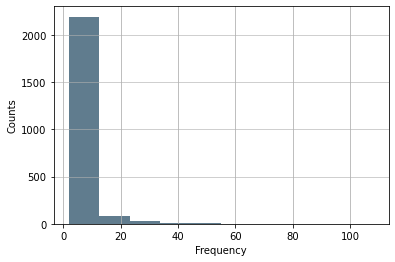

In [199]:
size, scale = 2000, 100
commutes = rfmTable_rain.frequency
commutes.plot.hist(grid=True, bins=10, rwidth=1, color='#607c8e')
plt.xlabel('Frequency')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)